# Introduction à `scikit-learn`

Dans cette séance, vous allez découvrir le module `scikit-learn` et le manipuler pour réaliser plusieurs tâches d'apprentissage automatique.

## 1. Chargement et préparation des données

Pour ce TP, vous allez travailler avec le jeu de données Iris. 

**Question 1.1.** Utilisez la documentation de `scikit-learn` pour découvrir comment charger ce jeu de données en mémoire dans des `numpy.array` nommés `X` (pour les variables explicatives) et `y` (pour la variable cible).

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

**Question 1.2.** Combien d'individus composent ce jeu de données ? Combien de variables explicatives a-t-on ? Et de quel type de problème (régression, classification, ...) s'agit-il ?

In [3]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

**Question 1.3.** Est-il nécessaire de pré-traiter les données ? Si oui, faites-le en vous assurant que chaque atttribut soit de moyenne nulle et de variance unitaire. Vérifiez l'effet du prétraitement.

In [8]:
X.mean(axis=0), X.std(axis=0)

(array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 array([0.82530129, 0.43441097, 1.75940407, 0.75969263]))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.mean(axis=0), X_scaled.std(axis=0)

(array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15]),
 array([1., 1., 1., 1.]))

**Question 1.4.** Visualisez vos données dans le premier plan de l'ACP. Vous utiliserez la classe [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) pour calculer les coordonnées de vos individus dans le premier plan de l'ACP.

In [11]:
from sklearn.decomposition import PCA

acp = PCA(n_components=2)
X_acp = acp.fit_transform(X_scaled)

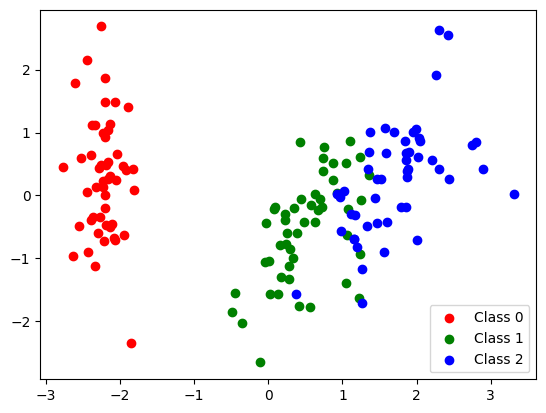

In [15]:
import matplotlib.pyplot as plt

colors = ["red", "green", "blue"]
for i in range(3):
    plt.scatter(X_acp[y==i, 0], X_acp[y==i, 1], color=colors[i], label=f"Class {i}")
plt.legend();

**Question 1.5.** Y a-t-il une classe qui semble facilement séparable des deux autres ? Si oui, laquelle ?

_VOTRE RÉPONSE ICI_

## 2. Classification non supervisée (_Clustering_)

Dans cette partie, vous allez de nouveau travailler sur le jeu de données en dimension 4 standardisé.

**Question 2.1.** Appliquez un _clustering_ $k$-means pour isoler 4 sous-groupes de données dans ce jeu de données.

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
cluster_ids = km.fit_predict(X_scaled)

/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


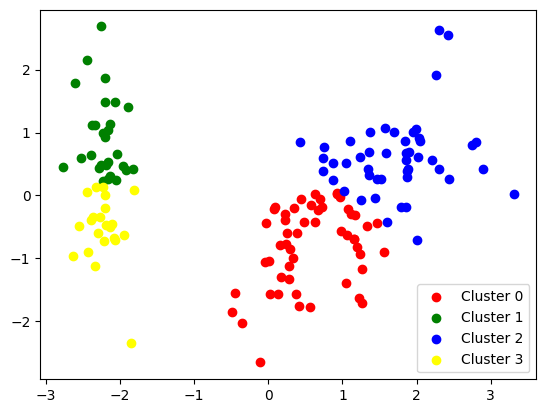

In [22]:
import matplotlib.pyplot as plt

colors = ["red", "green", "blue", "yellow"]
for i in range(4):
    plt.scatter(X_acp[cluster_ids==i, 0], X_acp[cluster_ids==i, 1], color=colors[i], label=f"Cluster {i}")
plt.legend();

Les objets de type `KMeans`, une fois fittés, disposent d'un attribut `labels_` qui donne les affectations des individus d’entraînement aux clusters.

**Question 2.2.** Visualisez les clusters obtenus (vous pourrez utiliser les données représentées dans le premier plan de l'ACP pour cela).

**Question 2.3.** Répétez l'opération avec un autre algorithme de _clustering_ de votre choix.

In [23]:
from sklearn.cluster import AgglomerativeClustering

cah = AgglomerativeClustering(n_clusters=4)
cluster_ids = cah.fit_predict(X_scaled)

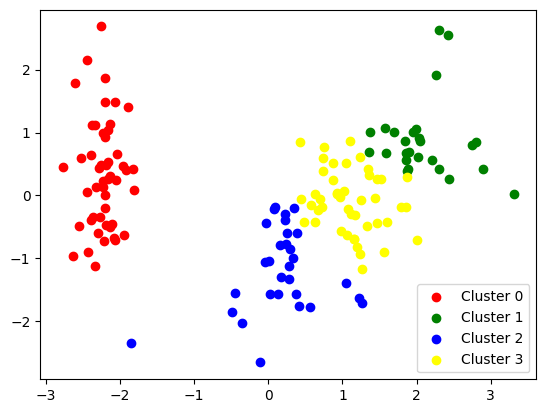

In [24]:
import matplotlib.pyplot as plt

colors = ["red", "green", "blue", "yellow"]
for i in range(4):
    plt.scatter(X_acp[cluster_ids==i, 0], X_acp[cluster_ids==i, 1], color=colors[i], label=f"Cluster {i}")
plt.legend();

## 3. Classification supervisée

Vous allez maintenant entraîner des modèles de classification supervisée sur ces données Iris.

**Question 3.1.** Que devez-vous faire pour être capables d'évaluer de manière fiable les performances des modèles ?

_VOTRE RÉPONSE ICI_

**Question 3.2.** Consultez la documentation du sous-module [`model_selection`](https://scikit-learn.org/stable/api/sklearn.model_selection.html) et trouvez comment diviser votre jeu de données en données d'apprentissage d'une part et de test d'autre part.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=0)

**Question 3.3.** Évaluez la performance d'un modèle de [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) à noyau Gaussien sur cette tâche.

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1., gamma="scale")
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

**Question 3.4.** Faites de même avec un modèle de forêt aléatoire.

In [29]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(n_estimators=3)
f.fit(X_train, y_train)
f.score(X_test, y_test)

0.9555555555555556

## 4. La notion de _pipeline_

Dans la partie précédente, vous avez peut-être commis une faute **impardonnable** : si vous avez travaillé avec les données mises à l'échelle, vous avez (peut-être sans vous en rendre compte) utilisé de l'information issue du jeu de test lors de l'apprentissage. En effet, les paramètres de mise à l'échelle des données ont été calculés (en début de séance) sur le jeu de données complet (et donc notamment des données qui se sont ensuite retrouvées dans le jeu de test).

Pour éviter ce genre de mésaventures, `scikit-learn` permet de créer des _pipelines_, c'est-à-dire des enchaînements de traitements (par exemple pré-traitement suivi de classification supervisée) encapsulés dans un seul objet.

**Question 4.1.** Créez un _pipeline_ pour évaluer de manière plus fiable la performance d'une forêt aléatoire sur la tâche ci-dessus.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
pipe = Pipeline(
    [
        ("scale", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=1))
    ]
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9333333333333333

## 5. La sélection de modèle

Une étape important en apprentissage automatique est la sélection de modèle, et notamment le choix d'hyper-paramètres performants pour une méthode donnée.

Cela se fait à l'aide de la classe [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

**Question 5.1.** Pour le modèle SVM utilisé plus haut, évaluez s'il est préférable d'utiliser un noyau linéaire ou Gaussien et quelle valeur il faut fixer pour l'hyper-paramètre $C$.

In [37]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
# clf.score(X_test, y_test)
clf.best_estimator_

SVC(C=1, kernel='linear')

## 6. La parallélisation

Dans cette partie, vous allez paralléliser certains des traitements effectués plus haut. Si vous souhaitez paralléliser des traitements à l'aide du backend `dask`, il vous faudra exécuter la commande suivante dans un terminal :

```
pip install "dask[distributed]"
```

puis explicitement créer un objet de type `Client` dask :

```python
from dask.distributed import Client

client = Client(processes=False)
```

**Question 6.1.** D'après [la documentation (User Guide)](https://scikit-learn.org/stable/modules/clustering.html#k-means), quel moyen a-t-on pour paralléliser l'algorithme des $k$-means en `scikit-learn` ? Mettez en oeuvre une parallélisation sur 4 coeurs de ce que vous aviez fait à la question 2.1.

**Question 6.2.** Même question pour l'algorithme DBSCAN que vous avez peut-être utilisé à la question 2.3.

**Question 6.3.** Parallélisez sur 4 coeurs une recherche d'hyper-paramètre pour une classification aux [$k$-plus proches voisins](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

## Exercice de synthèse

**Question.** En utilisant les données disponibles à l'adresse <https://www.kaggle.com/competitions/titanic>, comparez plusieurs modèles et concluez quant à leurs performances relatives. Vous implémenterez notamment une classe `CustomMLPClassifier` en vous basant sur le code ci-dessous pour inclure un réseau de neurones de type Perceptron Multi-Couches dans votre comparaison.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.base import BaseEstimator

class CustomMLPClassifier(BaseEstimator):
    # À vous de modifier le __init__ pour permettre de fixer les 
    # hyper-paramètres qui vous semblent les plus importants
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        list_layers = []
        # À vous de jouer ici
        # ...
        self.model_ = Sequential(list_layers)

        self.model_.compile(loss="binary_crossentropy", optimizer="adam")
        self.model_.fit(X_train, y_train, epochs=10, verbose=0)
    
    def predict(self, X_test):
        return (self.model_(X_test).numpy() > 0.5).astype(int)

